In [1]:
import jax

from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

In [2]:
# Alternate for MNIST digits, The dataset contains 1797 8x8 images
X, y = load_digits(return_X_y = True)

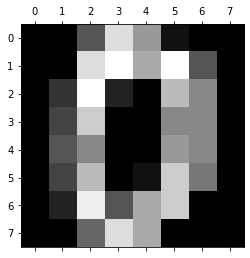

In [3]:
image = X[0]
image = image.reshape((8, 8))
_ = plt.matshow(image, cmap = 'gray')

Allowing mutation of variables in-place makes program analysis and transformation very difficult. JAX requires a pure functional expression of a numerical program.

Instead, JAX offers the functional update functions: **index_update**, **index_add**, **index_min**, **index_max**, and the **index** helper.

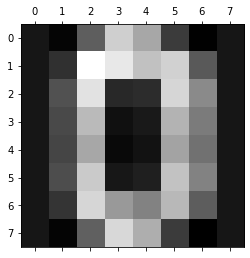

In [4]:
# Reconstruction only using the first 2 eigenvectors
U, s, V = jax.np.linalg.svd(image)
S = jax.np.zeros((image.shape[0], image.shape[1]))
Sigma = jax.ops.index_update(S, jax.ops.index[:image.shape[0], 0:image.shape[0]], jax.numpy.diag(s))
n_component = 2
S = Sigma[:, :n_component]
VT = V[:n_component, :]
A = U.dot(S.dot(VT))
_ = plt.matshow(A, cmap = 'gray')